# 넘파이 개념

In [2]:
# 객체 생성, 정보 조회
from numpy import array
a1 = array([10, 20, 30])
a2 = array([[10, 20, 30], [40, 50, 60]])
print(a1.shape, a2.shape)
print(a1.dtype, a2.dtype)

(3,) (2, 3)
int32 int32


In [3]:
# 색인
# 1. 정수 색인: 차원 축소
a1[1]

20

In [4]:
a2[0, 1]

20

In [5]:
# 2. 슬라이싱: 구간색인, 차원 유지
a1[1:]

array([20, 30])

In [6]:
a2[:1, 1:]

array([[20, 30]])

In [7]:
# 3. 불리언색인: 조건색인
a1 < 30

array([ True,  True, False])

In [8]:
a1[array([ True,  True, False])]

array([10, 20])

In [9]:
a1[a1 < 30]

array([10, 20])

In [10]:
# 4. 팬시 색인: 정렬색인
a1

array([10, 20, 30])

In [11]:
a1[2]

30

In [12]:
a1[0]

10

In [13]:
a1[[2, 0]]

array([30, 10])

In [14]:
# 연산 (유니버셜 함수)
# 1. 축: 방향
# a2의 열별 합계
a2.sum(0)

array([50, 70, 90])

In [15]:
# a2의 행별 합계
a2.sum(1)

array([ 60, 150])

In [17]:
a2

array([[10, 20, 30],
       [40, 50, 60]])

In [18]:
# 2. 브로드캐스팅: 배열의 연산이 가능하도록 모양을 맞춰주는 기능
a2 + 3

array([[13, 23, 33],
       [43, 53, 63]])

In [19]:
a1 + 3

array([13, 23, 33])

In [20]:
# 되는 경우
# (2, 3) + (3,)
a2 + a1

array([[20, 40, 60],
       [50, 70, 90]])

In [21]:
# 안 되는 경우
# (2, 3) + (2,)
a2 + array([3, 3])

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [22]:
# 안 되는 경우를 되도록 해주는 방법
# (2, 3) + (2,)=>(2,1)
a2 + array([3, 3]).reshape(2, 1)

array([[13, 23, 33],
       [43, 53, 63]])

# 결정트리를 이용한 분류

In [27]:
# 데이터 준비
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
print(iris.keys())
X = iris['data']
y = iris['target']
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['class'] = iris['target']
iris_df.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(120, 4) (120,)
(30, 4) (30,)


In [38]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [39]:
tree_clf.score(X_test, y_test)

0.9

In [40]:
tree_clf.score(X_train, y_train)

0.975

In [30]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, 
               out_file="iris_tree.dot",
               feature_names=iris["feature_names"],
               class_names=iris["target_names"],
               rounded=True,
               filled=True)

max_depth를 더 키우고 criterion을 entropy로 변경

In [41]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=4, 
                                  criterion='entropy')
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [42]:
tree_clf.score(X_test, y_test)

0.9

In [43]:
tree_clf.score(X_train, y_train)

1.0

In [35]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, 
               out_file="iris_tree.dot",
               feature_names=iris["feature_names"],
               class_names=iris["target_names"],
               rounded=True,
               filled=True)

In [36]:
!type "iris_tree.dot"

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="petal width (cm) <= 0.7\nentropy = 1.585\nsamples = 120\nvalue = [39, 40, 41]\nclass = virginica", fillcolor="#fdfdff"] ;
1 [label="entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal width (cm) <= 1.65\nentropy = 1.0\nsamples = 81\nvalue = [0, 40, 41]\nclass = virginica", fillcolor="#fcfafe"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petal length (cm) <= 4.95\nentropy = 0.365\nsamples = 43\nvalue = [0, 40, 3]\nclass = versicolor", fillcolor="#48e78a"] ;
2 -> 3 ;
4 [label="entropy = 0.0\nsamples = 39\nvalue = [0, 39, 0]\nclass = versicolor", fillcolor="#39e581"] ;
3 -> 4 ;
5 [label="petal width (cm) <= 1.55\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica", fillcolor="#ab7bee"] ;
3 -> 5 

In [44]:
DecisionTreeClassifier?

# 랜덤포레스트 분류기

In [57]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [58]:
rnd_clf.score(X_test, y_test)

0.9

In [59]:
rnd_clf.score(X_train, y_train)

1.0

In [61]:
# 배깅 분류기
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                        splitter='random'),
                  n_estimators=500, n_jobs=-1)

In [62]:
bag_clf.score(X_test, y_test)

0.9

In [63]:
bag_clf.score(X_train, y_train)

1.0

# 선형 회귀

In [68]:
# 데이터 준비
from sklearn.datasets import fetch_california_housing
import pandas as pd
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing['data'], 
                          columns=housing['feature_names'])
housing_df['MedHouseVal'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [67]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [69]:
X = housing['data']
y = housing['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


In [70]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [71]:
lin_reg.score(X_test, y_test)

0.602351103900529

In [72]:
lin_reg.score(X_train, y_train)

0.6071352982088065

In [73]:
lin_reg.coef_

array([ 4.34349486e-01,  9.74971059e-03, -1.00498516e-01,  6.12561836e-01,
       -2.35543905e-06, -3.47274140e-03, -4.24944996e-01, -4.37328627e-01])

In [74]:
lin_reg.intercept_

-37.15442450638787

0 0.4343494856270589
1 0.009749710586479887
2 -0.10049851609276007
3 0.6125618356663844
4 -2.355439045703331e-06
5 -0.003472741399692178
6 -0.4249449962042438
7 -0.4373286269257141


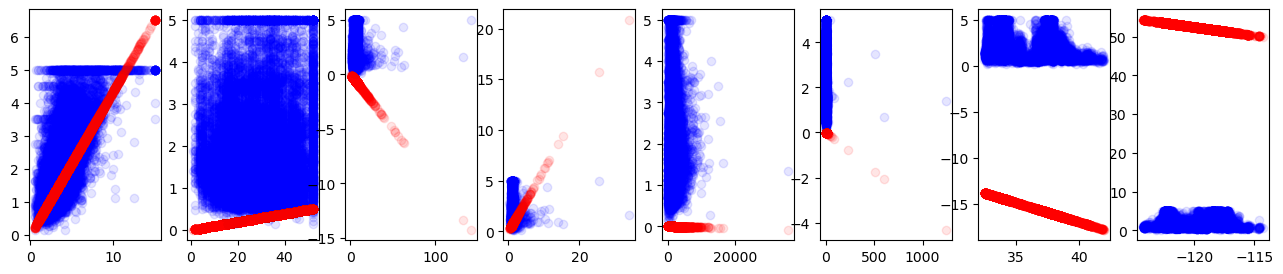

In [80]:
# 선형회귀 모델의 시각화
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 8, figsize=(16, 3))
for i, c in enumerate(lin_reg.coef_):
    print(i, c)
    xdata = X_train[:, i]
    ydata = y_train
    ydata_p = c*xdata
    ax[i].scatter(xdata, ydata, color='blue', alpha=0.1) # 원본데이터 산점도
    ax[i].scatter(xdata, ydata_p, color='red', alpha=0.1) # 회귀 방정식
    

# SGDRegressor 
* 확률적인 기울기하강 최적화를 이용한 회귀

In [81]:
# Z점수 표준화 적용
from sklearn.preprocessing import StandardScaler
zs = StandardScaler()
zs.fit(X_train)
X_train_zs = zs.transform(X_train)
X_test_zs = zs.transform(X_test)

In [99]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, penalty=None, eta0=0.01)
sgd_reg.fit(X_train_zs, y_train)

SGDRegressor(penalty=None)

In [100]:
sgd_reg.score(X_test_zs, y_test)

0.6017806424940193

In [101]:
sgd_reg.score(X_train_zs, y_train)

0.606312850200655

In [86]:
SGDRegressor?

# 릿지

In [102]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X_train_zs, y_train)

Ridge(alpha=1, solver='cholesky')

In [104]:
ridge_reg.score(X_test_zs, y_test)

0.6023507936000709

In [106]:
ridge_reg.score(X_train_zs, y_train)

0.6071352291143696

# 라쏘

In [115]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_zs, y_train)
print(f'시험셋의 결정계수: {lasso_reg.score(X_test_zs, y_test):.3f}')
print(f'훈련셋의 결정계수: {lasso_reg.score(X_train_zs, y_train):.3f}')

시험셋의 결정계수: 0.495
훈련셋의 결정계수: 0.494


In [114]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train_zs, y_train)
print(f'시험셋의 결정계수: {lasso_reg.score(X_test_zs, y_test):.3f}')
print(f'훈련셋의 결정계수: {lasso_reg.score(X_train_zs, y_train):.3f}')

시험셋의 결정계수: 0.597
훈련셋의 결정계수: 0.603


# 엘라스틱넷

In [116]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_zs, y_train)
print(f'시험셋의 결정계수: {elastic_net.score(X_test_zs, y_test):.3f}')
print(f'훈련셋의 결정계수: {elastic_net.score(X_train_zs, y_train):.3f}')

시험셋의 결정계수: 0.527
훈련셋의 결정계수: 0.528


In [126]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.5)
elastic_net.fit(X_train_zs, y_train)
print(f'시험셋의 결정계수: {elastic_net.score(X_test_zs, y_test):.3f}')
print(f'훈련셋의 결정계수: {elastic_net.score(X_train_zs, y_train):.3f}')

시험셋의 결정계수: 0.602
훈련셋의 결정계수: 0.607


# 로지스틱 회귀

In [129]:
# 붓꽃 데이터를 이진분류 용으로 준비
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int32)
print(X.shape, y.shape)

(150, 1) (150,)


In [151]:
from sklearn.model_selection import train_test_split
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print('훈련셋의 타겟레이블 값 별 빈도:', pd.Series(y_train).value_counts())
print('시험셋의 타겟레이블 값 별 빈도:', pd.Series(y_test).value_counts())

(120, 1) (120,)
(30, 1) (30,)
훈련셋의 타겟레이블 값 별 빈도: 0    80
1    40
dtype: int64
시험셋의 타겟레이블 값 별 빈도: 0    20
1    10
dtype: int64


In [152]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train) # 원래는 특성스케일링 적용
print(f'시험셋의 정확도: {log_clf.score(X_test, y_test):.3f}')
print(f'훈련셋의 정확도: {log_clf.score(X_train, y_train):.3f}')

시험셋의 정확도: 1.000
훈련셋의 정확도: 0.950


In [153]:
log_clf.predict(X_test[16:20])

array([0, 0, 0, 1])

In [154]:
y_test[16:20]

array([0, 0, 0, 1])

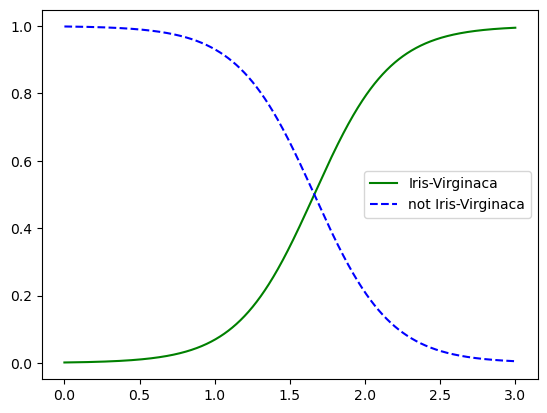

In [160]:
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_clf.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginaca')
plt.plot(X_new, y_proba[:, 0], 'b--', label='not Iris-Virginaca')
plt.legend(loc='best')

In [162]:
np.where(np.abs(y_proba - 0.5) < 0.01)

(array([551, 551, 552, 552, 553, 553, 554, 554, 555, 555, 556, 556],
       dtype=int64),
 array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int64))

In [163]:
y_proba[551]

array([0.50748715, 0.49251285])

In [164]:
X_new[551]

array([1.65465465])

In [166]:
log_clf.predict([[1.7], [1.65], [1.5]])

array([1, 0, 0])